In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import h5py

# Problem statement

This computer vision application detects whether a person is smiling or not. For the target variable, we use `Smiling = 1` and `Not smiling = 0`.

# Loads the training and test dataset

In [2]:
def load_happy_dataset():
    train_dataset = h5py.File('datasets/train_happy.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_happy.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

# Process the images

In [3]:
# Normalize image vectors
X_train = X_train_orig / 255.
X_test = X_test_orig / 255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("\nX_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150

X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


# Visualize a training example

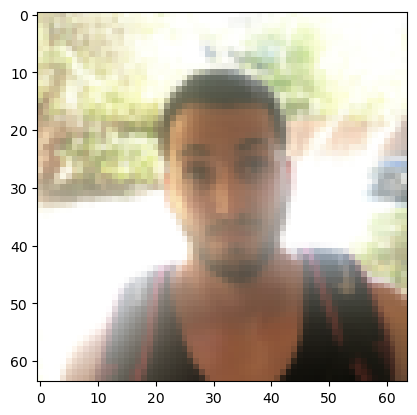

In [4]:
index = 8
plt.imshow(X_train_orig[index]) #display sample training image
plt.show()

# Keras Sequential Model

Using TF Keras' Sequential model we use the following network:

    `ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE`

In [5]:
def happyModel():
    """
    Implements the forward propagation for the binary classification model:
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code all the values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    None

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """
    model = tf.keras.Sequential([
            ## ZeroPadding2D with padding 3, input shape of 64 x 64 x 3
            tf.keras.layers.ZeroPadding2D(padding=3, input_shape=(64, 64, 3)),

            ## Conv2D with 32 7x7 filters and stride of 1
            tf.keras.layers.Conv2D(filters=32, kernel_size=(7,7), strides=(1, 1), padding='valid'),

            ## BatchNormalization for axis 3
            tf.keras.layers.BatchNormalization(axis=3),

            ## ReLU
            tf.keras.layers.ReLU(),

            ## Max Pooling 2D with default parameters
            tf.keras.layers.MaxPool2D(),

            ## Flatten layer
            tf.keras.layers.Flatten(),

            ## Dense layer with 1 unit for output & 'sigmoid' activation
            tf.keras.layers.Dense(1, activation='sigmoid') # since this is a binary classification problem
        ])
    
    return model

happy_model = happyModel()

# Compile the CNN model

In [6]:
happy_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

# Summary of the CNN model

In [7]:
happy_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 70, 70, 3)        0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                        

# Trains the model

In [8]:
happy_model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 [==============================] - 1s 14ms/step - loss: 1.1392 - accuracy: 0.7517
Epoch 2/10
38/38 [==============================] - 1s 14ms/step - loss: 0.2588 - accuracy: 0.8833
Epoch 3/10
38/38 [==============================] - 1s 13ms/step - loss: 0.1877 - accuracy: 0.9133
Epoch 4/10
38/38 [==============================] - 1s 15ms/step - loss: 0.1129 - accuracy: 0.9600
Epoch 5/10
38/38 [==============================] - 1s 14ms/step - loss: 0.2172 - accuracy: 0.9133
Epoch 6/10
38/38 [==============================] - 1s 14ms/step - loss: 0.1817 - accuracy: 0.9317
Epoch 7/10
38/38 [==============================] - 1s 17ms/step - loss: 0.2292 - accuracy: 0.9217
Epoch 8/10
38/38 [==============================] - 1s 14ms/step - loss: 0.1269 - accuracy: 0.9533
Epoch 9/10
38/38 [==============================] - 1s 15ms/step - loss: 0.1064 - accuracy: 0.9617
Epoch 10/10
38/38 [==============================] - 0s 13ms/step - loss: 0.0831 - accuracy: 0.9717


# Evaluate the model

In [9]:
happy_model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 8ms/step - loss: 0.2258 - accuracy: 0.9000


[0.22577185928821564, 0.8999999761581421]

Loss and Accuracy